## 결측치 처리

In [1]:
!pip install missingno
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
import io

In [3]:
files.upload()

Saving sampled_car_prices2.csv to sampled_car_prices2.csv


{'sampled_car_prices2.csv': b"year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate\n2013,Volkswagen,Beetle,Turbo PZEV Fender Edition,Hatchback,automatic,3vwva7at3dm607384,nv,4.0,62362.0,red,red,findlay toyota and scion,14250.0,14000.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)\n2013,Ford,Escape,SEL,SUV,automatic,1fmcu0h91dub28777,ga,49.0,13100.0,gray,gray,ford motor credit company llc pd,19300.0,18900.0,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)\n2013,Nissan,Altima,2.5,Sedan,automatic,1n4al3ap6dn513499,tn,31.0,39629.0,red,black,avis corporation,12900.0,12600.0,Wed Feb 11 2015 02:30:00 GMT-0800 (PST)\n2013,Chrysler,200,LX,Sedan,automatic,1c3ccbab7dn762867,ca,2.0,24938.0,white,black,enterprise vehicle exchange / tra / rental / tulsa,11000.0,8200.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)\n2013,Chevrolet,Equinox,LT,SUV,automatic,2gnaldek1d6145582,ca,28.0,65124.0,black,gray,ge fleet services for itself/servicer,13500.0,13600.0,Wed Dec

In [4]:
df = pd.read_csv('sampled_car_prices2.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Volkswagen,Beetle,Turbo PZEV Fender Edition,Hatchback,automatic,3vwva7at3dm607384,nv,4.0,62362.0,red,red,findlay toyota and scion,14250.0,14000.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)
1,2013,Ford,Escape,SEL,SUV,automatic,1fmcu0h91dub28777,ga,49.0,13100.0,gray,gray,ford motor credit company llc pd,19300.0,18900.0,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
2,2013,Nissan,Altima,2.5,Sedan,automatic,1n4al3ap6dn513499,tn,31.0,39629.0,red,black,avis corporation,12900.0,12600.0,Wed Feb 11 2015 02:30:00 GMT-0800 (PST)
3,2013,Chrysler,200,LX,Sedan,automatic,1c3ccbab7dn762867,ca,2.0,24938.0,white,black,enterprise vehicle exchange / tra / rental / t...,11000.0,8200.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
4,2013,Chevrolet,Equinox,LT,SUV,automatic,2gnaldek1d6145582,ca,28.0,65124.0,black,gray,ge fleet services for itself/servicer,13500.0,13600.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10000 non-null  int64  
 1   make          9999 non-null   object 
 2   model         9999 non-null   object 
 3   trim          9999 non-null   object 
 4   body          9998 non-null   object 
 5   transmission  9009 non-null   object 
 6   vin           10000 non-null  object 
 7   state         10000 non-null  object 
 8   condition     9879 non-null   float64
 9   odometer      10000 non-null  float64
 10  color         9984 non-null   object 
 11  interior      9984 non-null   object 
 12  seller        10000 non-null  object 
 13  mmr           9999 non-null   float64
 14  sellingprice  9999 non-null   float64
 15  saledate      9999 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

year              0
make              1
model             1
trim              1
body              2
transmission    991
vin               0
state             0
condition       121
odometer          0
color            16
interior         16
seller            0
mmr               1
sellingprice      1
saledate          1
dtype: int64

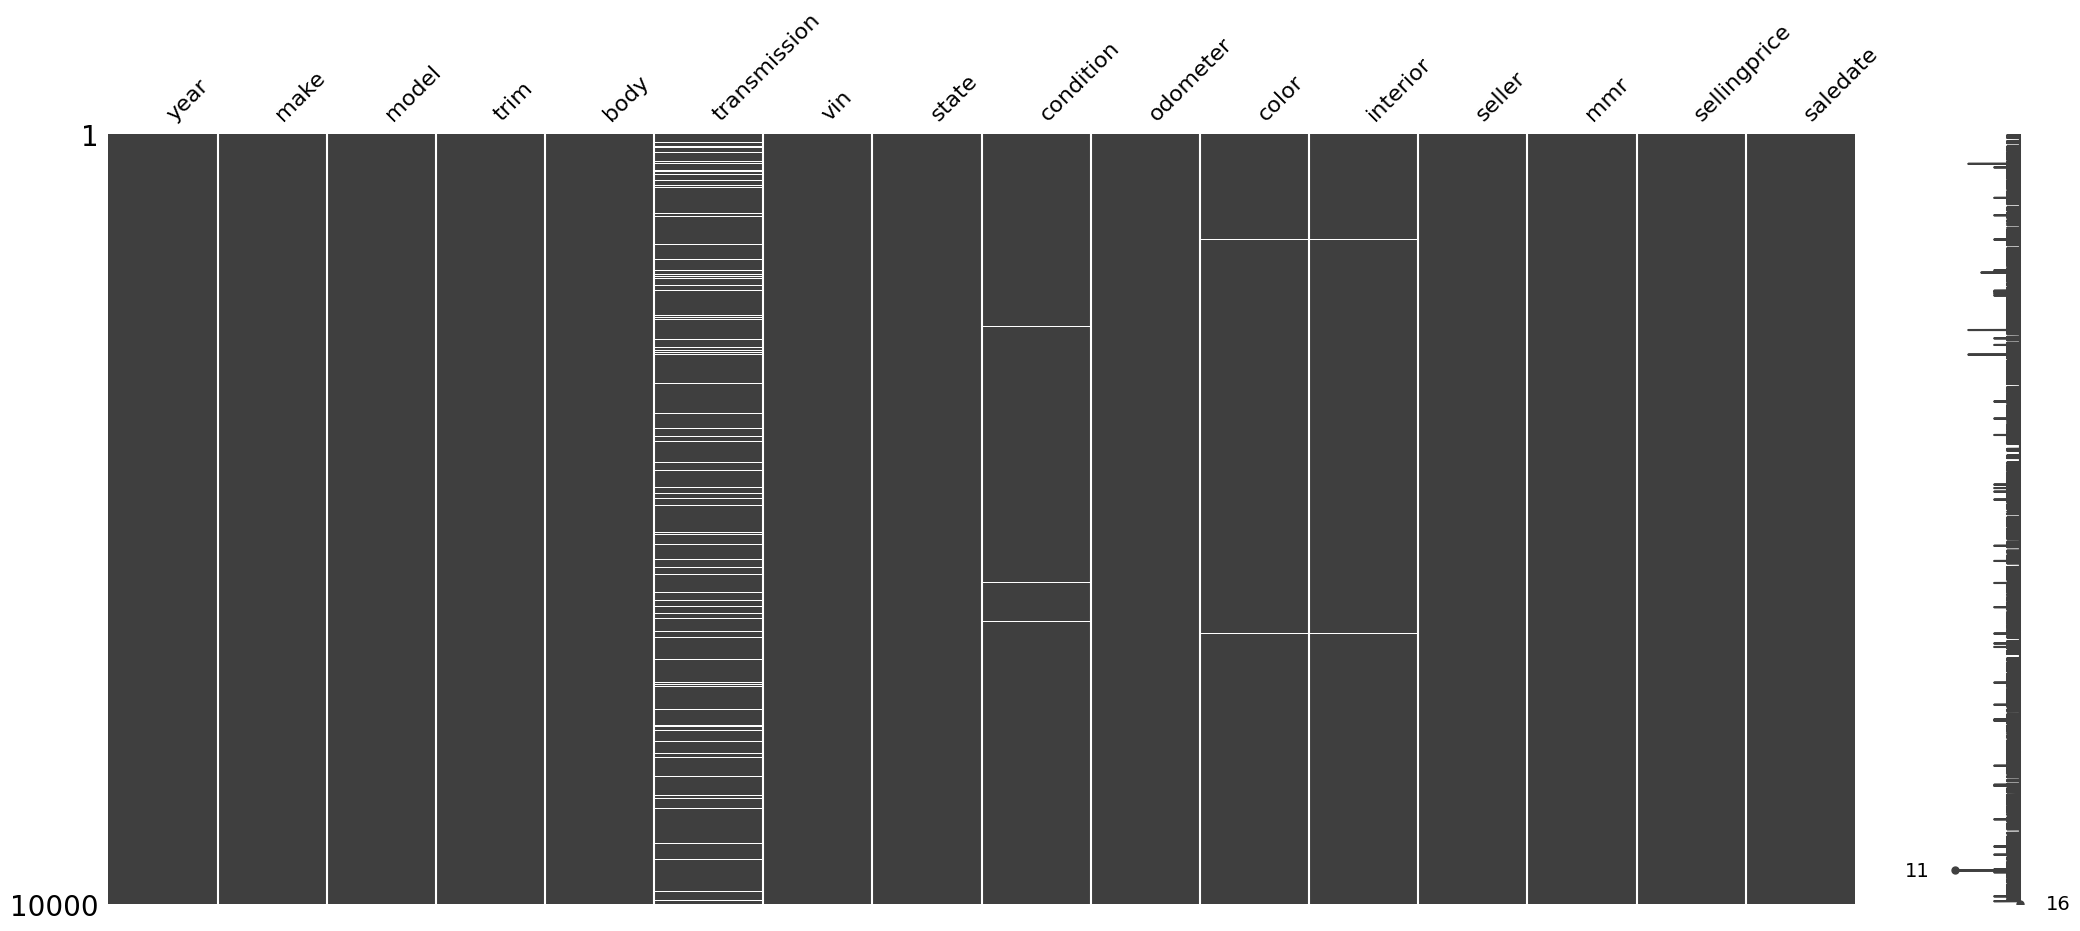

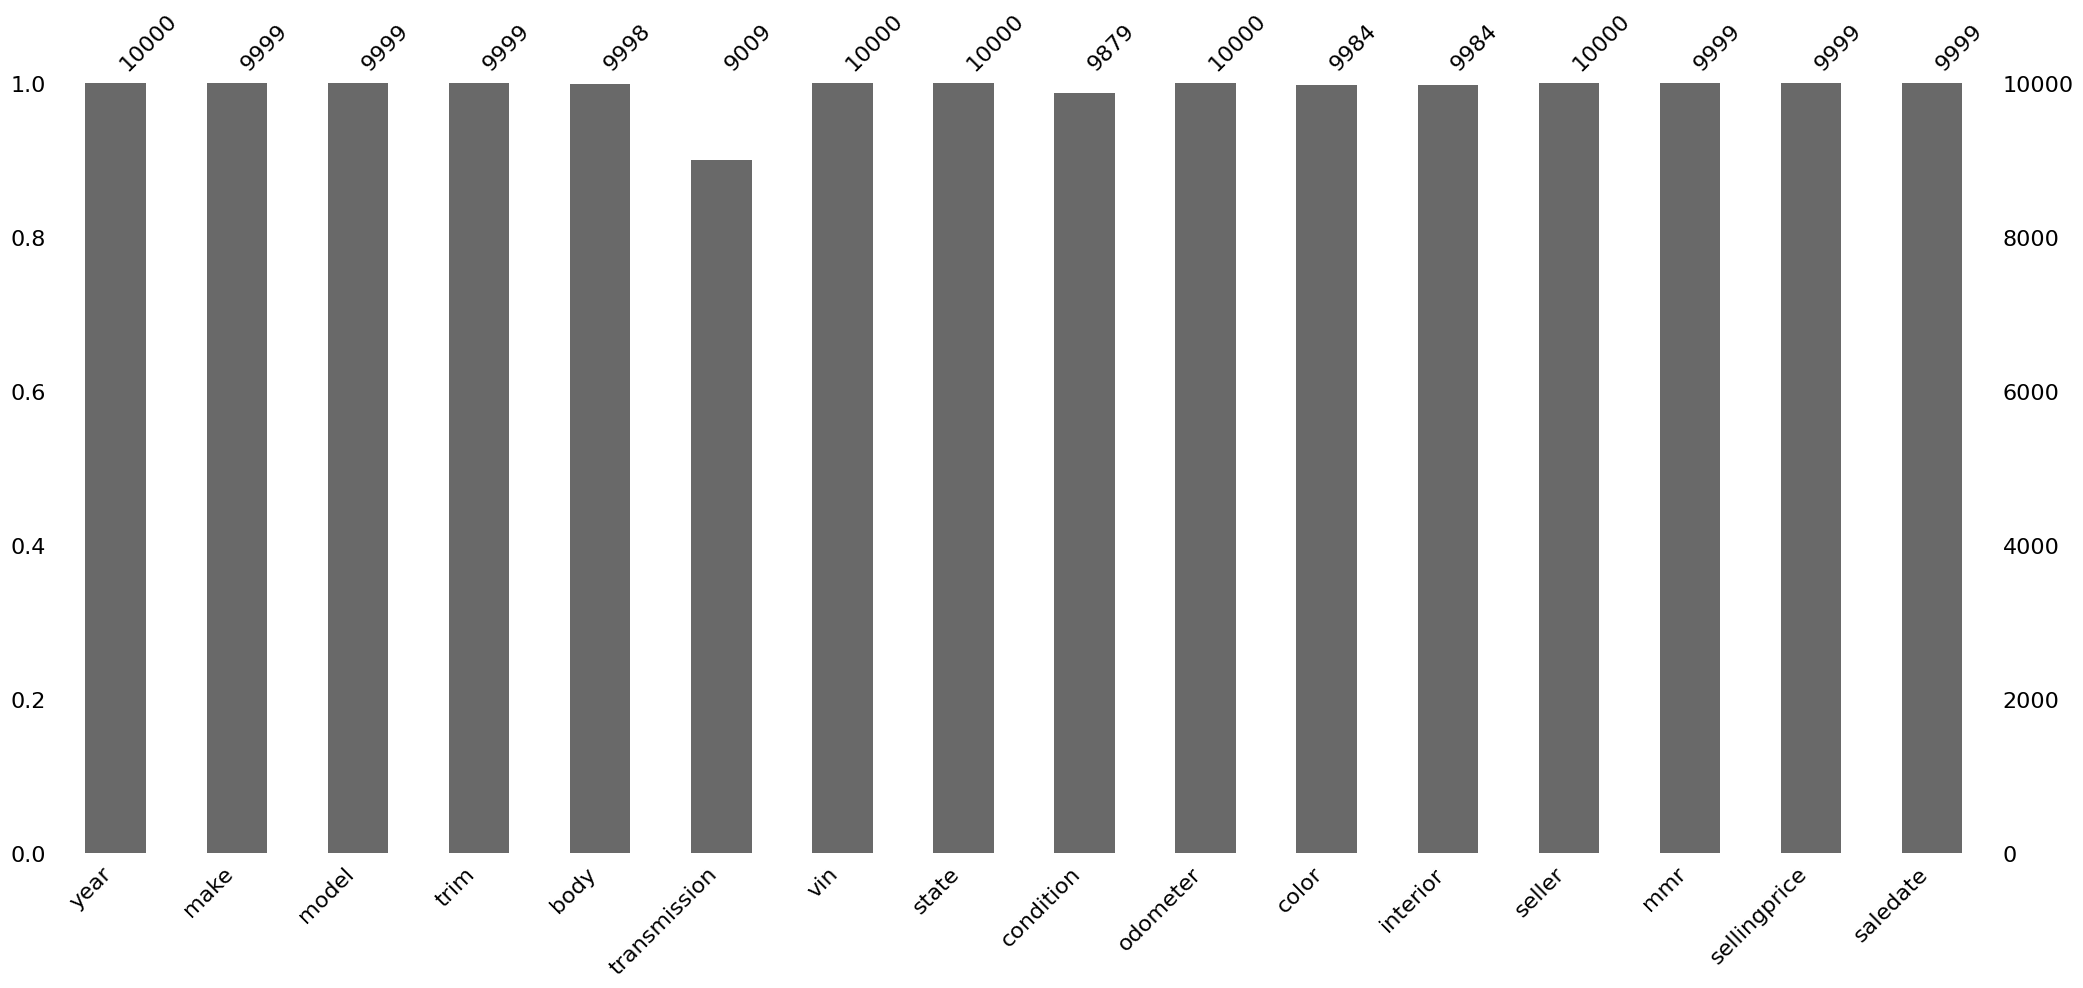

In [7]:
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

In [8]:
def is_emptystring(x):
  return x.eq('').any()

df.apply(lambda x:is_emptystring(x))

year            False
make            False
model           False
trim            False
body            False
transmission    False
vin             False
state           False
condition       False
odometer        False
color           False
interior        False
seller          False
mmr             False
sellingprice    False
saledate        False
dtype: bool

In [9]:
df_drop_all = df.dropna(how='all')
df_drop_3 = df.dropna(thresh=3)
df_drop_slt = df.dropna(subset=['condition'])
df_drop_any = df.dropna(how='any')
df_drop_any.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## 이상치 처리

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Volkswagen,Beetle,Turbo PZEV Fender Edition,Hatchback,automatic,3vwva7at3dm607384,nv,4.0,62362.0,red,red,findlay toyota and scion,14250.0,14000.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST)
1,2013,Ford,Escape,SEL,SUV,automatic,1fmcu0h91dub28777,ga,49.0,13100.0,gray,gray,ford motor credit company llc pd,19300.0,18900.0,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
2,2013,Nissan,Altima,2.5,Sedan,automatic,1n4al3ap6dn513499,tn,31.0,39629.0,red,black,avis corporation,12900.0,12600.0,Wed Feb 11 2015 02:30:00 GMT-0800 (PST)
3,2013,Chrysler,200,LX,Sedan,automatic,1c3ccbab7dn762867,ca,2.0,24938.0,white,black,enterprise vehicle exchange / tra / rental / t...,11000.0,8200.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
4,2013,Chevrolet,Equinox,LT,SUV,automatic,2gnaldek1d6145582,ca,28.0,65124.0,black,gray,ge fleet services for itself/servicer,13500.0,13600.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST)


In [12]:
df['odometer'].describe()

count     10000.000000
mean      34395.664800
std       20807.209534
min           1.000000
25%       20538.250000
50%       32121.500000
75%       43751.500000
max      999999.000000
Name: odometer, dtype: float64

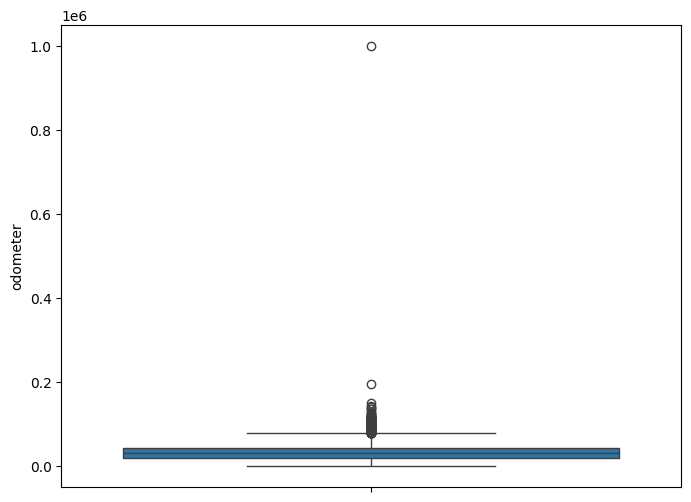

In [13]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'odometer', data = df)
plt.show()

In [14]:
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 3

filter = (df['odometer'] >= Q1 - rev_range * IQR) & (df['odometer'] <= Q3 + rev_range * IQR)
df_rmv = df.loc[filter]
print(df['odometer'].describe())
print(df_rmv['odometer'].describe())

count     10000.000000
mean      34395.664800
std       20807.209534
min           1.000000
25%       20538.250000
50%       32121.500000
75%       43751.500000
max      999999.000000
Name: odometer, dtype: float64
count      9980.000000
mean      34117.701102
std       17955.055470
min           1.000000
25%       20518.750000
50%       32045.000000
75%       43644.500000
max      113067.000000
Name: odometer, dtype: float64


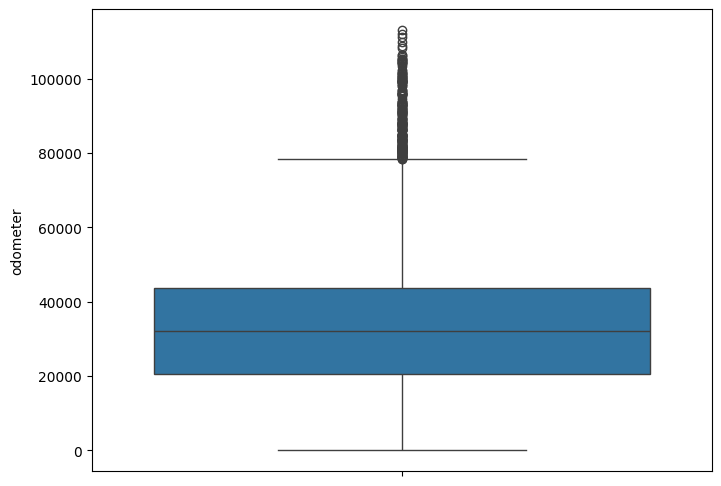

In [15]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'odometer', data = df_rmv)
plt.show()

In [16]:
def replace_outlier(value):
    Q1 = df['odometer'].quantile(0.25)
    Q3 = df['odometer'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    if ((value < (Q1 - rev_range * IQR))):
        return Q1 - rev_range * IQR
    if ((value > (Q3 + rev_range * IQR))):
        return Q3 + rev_range * IQR

    return value

df['odometer'] = df['odometer'].apply(replace_outlier)

print(df['odometer'].describe())

count     10000.000000
mean      34276.248200
std       18283.432194
min           1.000000
25%       20538.250000
50%       32121.500000
75%       43751.500000
max      113391.250000
Name: odometer, dtype: float64


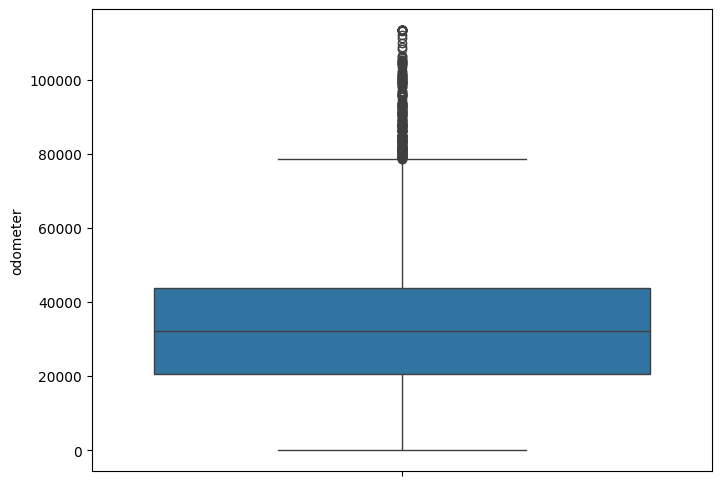

In [17]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'odometer', data = df)
plt.show()

## 변수 구간화

In [18]:
!pip install xverse
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
files.upload()

Saving sampled_application_record.csv to sampled_application_record.csv


{'sampled_application_record.csv': b'ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS\n5890239,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,With parents,-21605,365243,1,0,0,0,,2.0\n5938189,F,Y,Y,0,180000.0,Working,Higher education,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0\n6352093,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0\n7976654,F,Y,Y,0,202500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0\n5853633,M,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20785,365243,1,0,0,0,,2.0\n6525128,F,N,N,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-15272,365243

In [24]:
df = pd.read_csv("sampled_application_record.csv", encoding = 'utf-8')

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,Y,Y,0,180000.0,Working,Higher education,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,Y,Y,0,202500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


In [25]:
df['AMT_INCOME_TOTAL'].describe()

count    1.000000e+04
mean     1.882933e+05
std      1.298293e+05
min      2.925000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

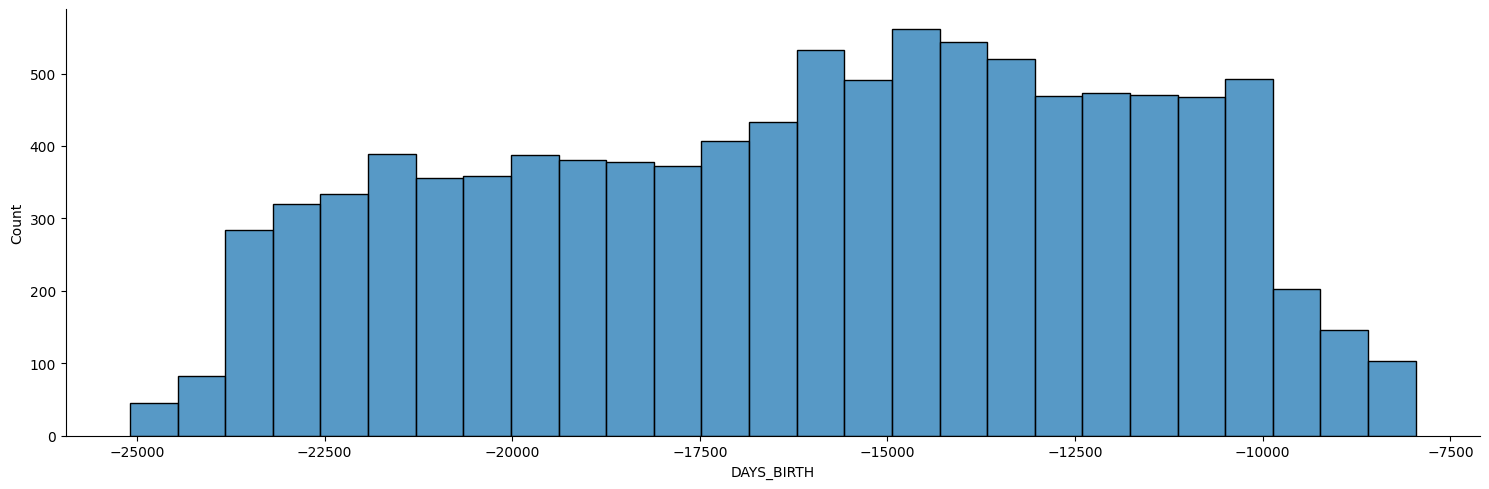

In [27]:
%matplotlib inline
sns.displot(df['DAYS_BIRTH'],height = 5, aspect = 3)

In [28]:
df1 = df.copy()

df1.insert(2, 'bin', 0)

df1.loc[df1['DAYS_BIRTH'] <= -27500, 'bin'] = 'a'
df1.loc[(df1['DAYS_BIRTH'] > -27500) & (df1['DAYS_BIRTH'] <= -22500), 'bin'] = 'b'
df1.loc[(df1['DAYS_BIRTH'] > -22500) & (df1['DAYS_BIRTH'] <= -20000), 'bin'] = 'c'
df1.loc[(df1['DAYS_BIRTH'] > -20000) & (df1['DAYS_BIRTH'] <= -17500), 'bin'] = 'd'
df1.loc[(df1['DAYS_BIRTH'] > -17500) & (df1['DAYS_BIRTH'] <= -15000), 'bin'] = 'e'
df1.loc[(df1['DAYS_BIRTH'] > -15000) & (df1['DAYS_BIRTH'] <= -12500), 'bin'] = 'f'
df1.loc[(df1['DAYS_BIRTH'] > -12500) & (df1['DAYS_BIRTH'] <= -10000), 'bin'] = 'g'
df1.loc[(df1['DAYS_BIRTH'] > -10000) & (df1['DAYS_BIRTH'] <= -7500), 'bin'] = 'h'
df1.loc[(df1['DAYS_BIRTH'] > -7500), 'bin'] = 'i'

df1.head()

,ID,CODE_GENDER,bin,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,c,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,g,Y,Y,0,180000.0,Working,Higher education,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,f,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,d,Y,Y,0,202500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,c,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


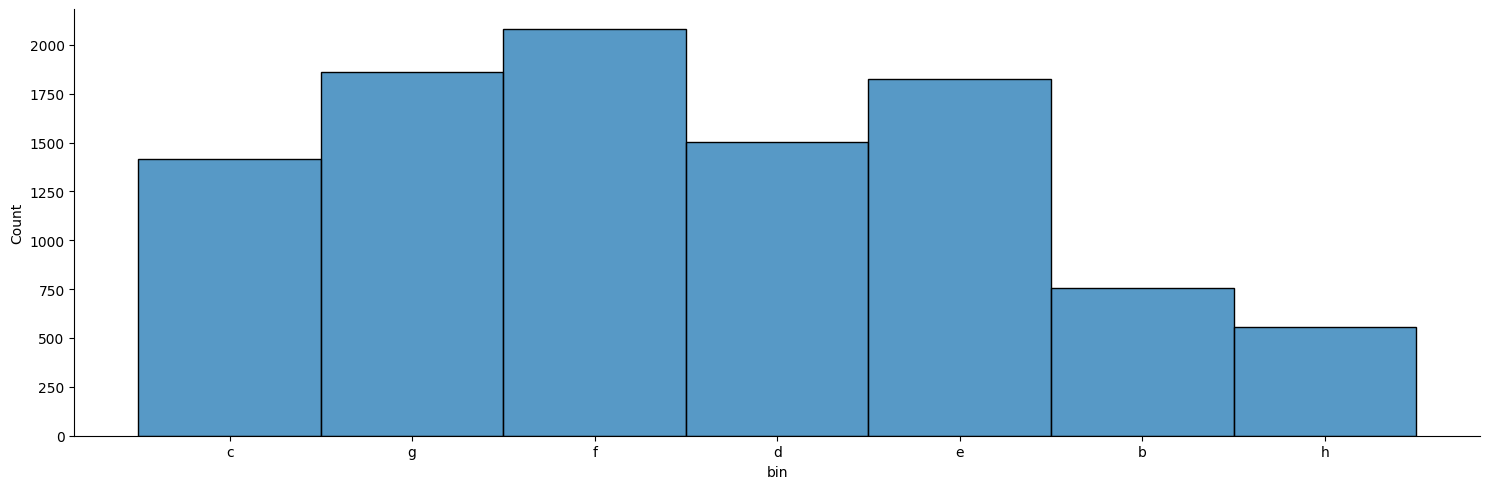

In [30]:
sns.displot(df1['bin'],height = 5, aspect = 3)

## 데이터 표준화와 정규화 스케일링

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [38]:
df1.head()

,ID,CODE_GENDER,bin,BIRTH_bin3,BIRTH_bin2,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,c,0,0,N,N,0,112500.0,Pensioner,...,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,g,0,0,Y,Y,0,180000.0,Working,...,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,f,0,0,Y,Y,0,315000.0,Working,...,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,d,0,0,Y,Y,0,202500.0,Commercial associate,...,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,c,0,0,N,Y,0,157500.0,Pensioner,...,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


In [41]:
print(df.mean())
print('\n')
print(df.var())

ID                  6.019977e+06
CNT_CHILDREN        4.306000e-01
AMT_INCOME_TOTAL    1.882933e+05
DAYS_BIRTH         -1.602730e+04
DAYS_EMPLOYED       6.063665e+04
FLAG_MOBIL          1.000000e+00
FLAG_WORK_PHONE     2.038000e-01
FLAG_PHONE          2.924000e-01
FLAG_EMAIL          1.098000e-01
CNT_FAM_MEMBERS     2.195400e+00
dtype: float64


ID                  3.218205e+11
CNT_CHILDREN        5.250361e-01
AMT_INCOME_TOTAL    1.685564e+10
DAYS_BIRTH          1.741937e+07
DAYS_EMPLOYED       1.928092e+10
FLAG_MOBIL          0.000000e+00
FLAG_WORK_PHONE     1.622818e-01
FLAG_PHONE          2.069229e-01
FLAG_EMAIL          9.775374e-02
CNT_FAM_MEMBERS     8.060994e-01
dtype: float64


<ipython-input-41-b786764ebe89>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-41-b786764ebe89>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())


In [52]:
numeric_columns = df1.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
df_stand = scaler.fit_transform(df1[numeric_columns])
df_stand = pd.DataFrame(data=df_stand, columns=numeric_columns)
df_stand.head()

,ID,BIRTH_bin3,BIRTH_bin2,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,-0.228708,0.0,0.0,-0.594294,-0.583821,-1.336475,2.193799,0.0,-0.505931,-0.642828,-0.351202,-0.217647
1,-0.144179,0.0,0.0,-0.594294,-0.063882,1.319844,-0.449609,0.0,-0.505931,-0.642828,2.847362,-0.217647
2,0.585471,0.0,0.0,-0.594294,0.975997,0.526734,-0.440851,0.0,1.976555,-0.642828,-0.351202,-0.217647
3,3.449324,0.0,0.0,-0.594294,0.109432,-0.515571,-0.482774,0.0,-0.505931,-0.642828,-0.351202,-1.331498
4,-0.293239,0.0,0.0,-0.594294,-0.237195,-1.139995,2.193799,0.0,-0.505931,-0.642828,-0.351202,-0.217647


In [53]:
print(df_stand.mean())
print('\n')
print(df_stand.var())

ID                 -7.503331e-16
BIRTH_bin3          0.000000e+00
BIRTH_bin2          0.000000e+00
CNT_CHILDREN       -6.465939e-17
AMT_INCOME_TOTAL   -7.531753e-17
DAYS_BIRTH          2.099654e-16
DAYS_EMPLOYED       2.486900e-17
FLAG_MOBIL          0.000000e+00
FLAG_WORK_PHONE     3.552714e-17
FLAG_PHONE          2.913225e-17
FLAG_EMAIL          1.953993e-17
CNT_FAM_MEMBERS     1.843858e-16
dtype: float64


ID                  1.0001
BIRTH_bin3          0.0000
BIRTH_bin2          0.0000
CNT_CHILDREN        1.0001
AMT_INCOME_TOTAL    1.0001
DAYS_BIRTH          1.0001
DAYS_EMPLOYED       1.0001
FLAG_MOBIL          0.0000
FLAG_WORK_PHONE     1.0001
FLAG_PHONE          1.0001
FLAG_EMAIL          1.0001
CNT_FAM_MEMBERS     1.0001
dtype: float64


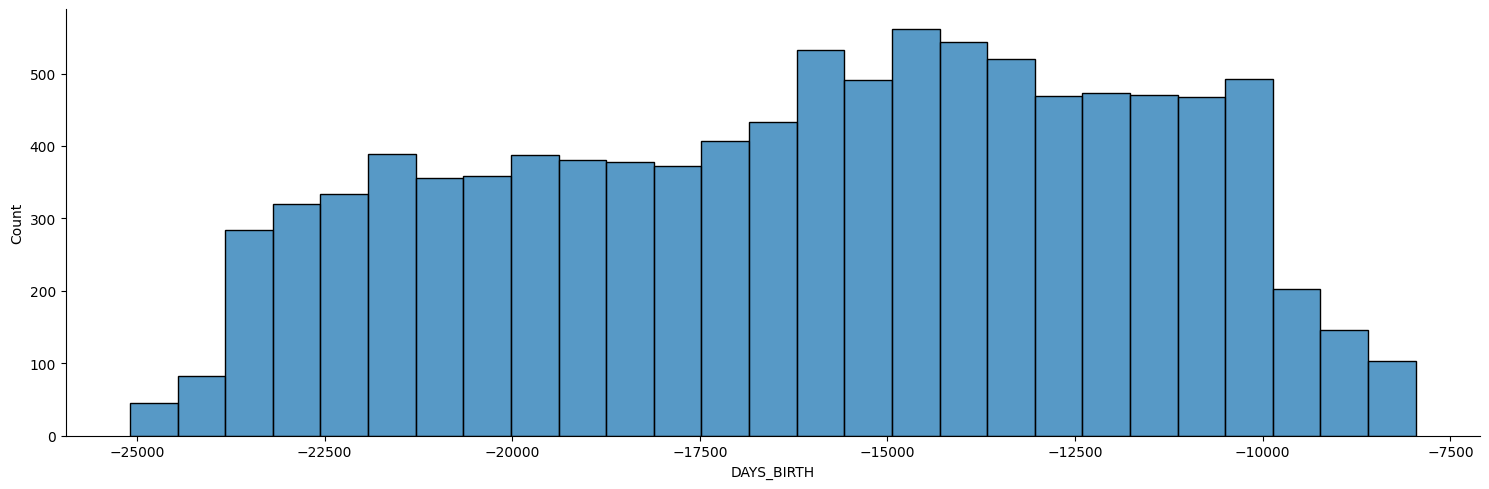

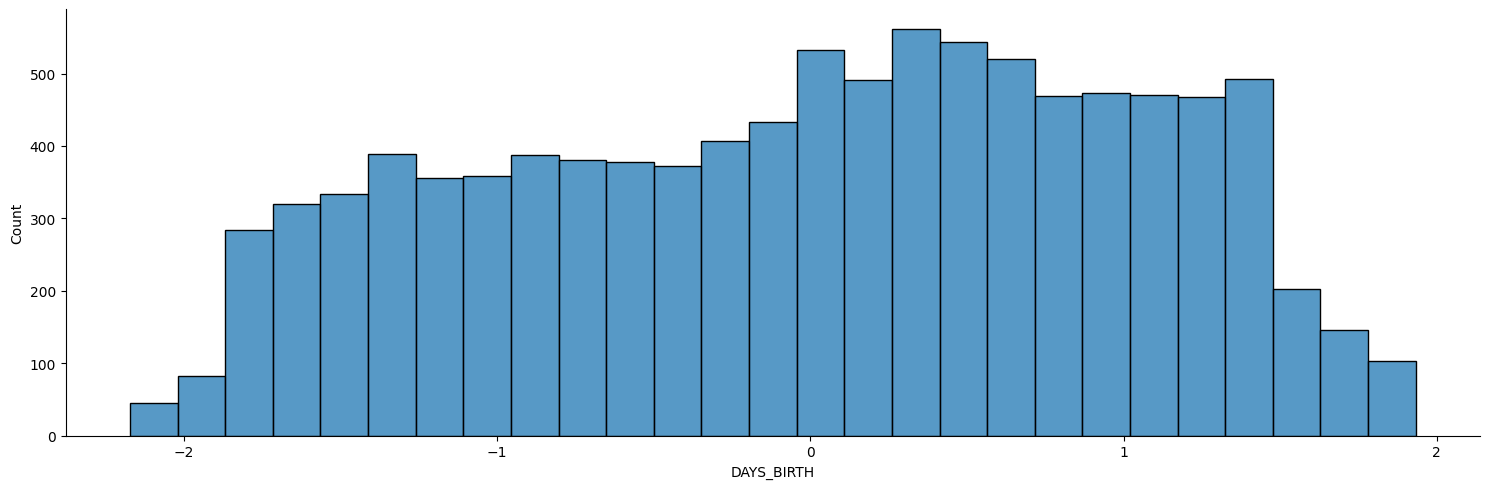

In [54]:
%matplotlib inline
sns.displot(df1['DAYS_BIRTH'], height = 5, aspect = 3)
sns.displot(df_stand['DAYS_BIRTH'],height = 5, aspect = 3)
plt.show()

## 모델 성능 향상을 위한 파생 변수 생성

In [55]:
import math
from sklearn import preprocessing
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df1.head()

,ID,CODE_GENDER,bin,BIRTH_bin3,BIRTH_bin2,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,c,0,0,N,N,0,112500.0,Pensioner,...,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,g,0,0,Y,Y,0,180000.0,Working,...,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,f,0,0,Y,Y,0,315000.0,Working,...,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,d,0,0,Y,Y,0,202500.0,Commercial associate,...,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,c,0,0,N,Y,0,157500.0,Pensioner,...,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


In [57]:
df['AMT_INCOME_TOTAL_log'] = preprocessing.scale(np.log(df['AMT_INCOME_TOTAL']+1))
df['AMT_INCOME_TOTAL_log2'] = df[['AMT_INCOME_TOTAL']].apply(lambda x: np.log(x+1))
df['AMT_INCOME_TOTAL_sqrt'] = np.sqrt(df['AMT_INCOME_TOTAL']+1)
df['AMT_INCOME_TOTAL_pow'] = pow(df[['AMT_INCOME_TOTAL']],2)

df.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_log,AMT_INCOME_TOTAL_log2,AMT_INCOME_TOTAL_sqrt,AMT_INCOME_TOTAL_pow
9995,5041106,F,N,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,NaN,2.0,0.410985,12.218500,450.001111,4.100625e+10
9996,5580660,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Separated,House / apartment,...,1,1,0,0,Laborers,2.0,-0.814754,11.630717,335.411687,1.265625e+10
9997,6543425,F,N,Y,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,1,Cooking staff,3.0,0.410985,12.218500,450.001111,4.100625e+10
9998,5680277,F,N,Y,0,270000.0,Working,Higher education,Single / not married,House / apartment,...,1,1,1,1,Core staff,1.0,1.010903,12.506181,519.616205,7.290000e+10
9999,7830997,M,N,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,1,0,Laborers,2.0,-0.113093,11.967187,396.863957,2.480625e+10


## 범주형 변수의 가변수 처리

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df1.head()

,ID,CODE_GENDER,bin,BIRTH_bin3,BIRTH_bin2,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,c,0,0,N,N,0,112500.0,Pensioner,...,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,g,0,0,Y,Y,0,180000.0,Working,...,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,f,0,0,Y,Y,0,315000.0,Working,...,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,d,0,0,Y,Y,0,202500.0,Commercial associate,...,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,c,0,0,N,Y,0,157500.0,Pensioner,...,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


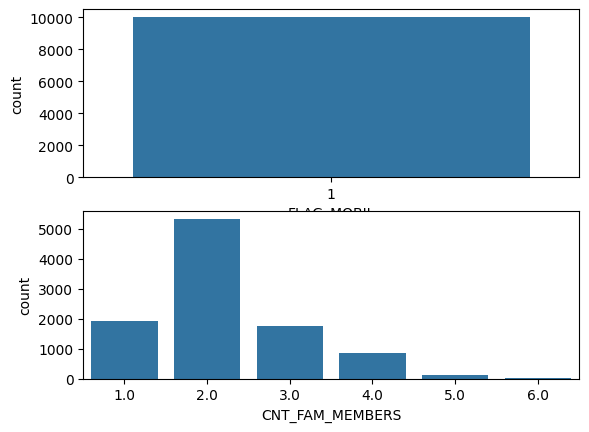

In [60]:
fig, ax = plt.subplots(nrows=2)
sns.countplot(x="FLAG_MOBIL", data=df, ax=ax[0])
sns.countplot(x="CNT_FAM_MEMBERS", data=df, ax=ax[1])

plt.show()

In [61]:
df2 = pd.get_dummies(df1)
df2.head()

,ID,BIRTH_bin3,BIRTH_bin2,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5890239,0,0,0,112500.0,-21605,365243,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5938189,0,0,0,180000.0,-10519,-1791,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6352093,0,0,0,315000.0,-13829,-575,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7976654,0,0,0,202500.0,-18179,-6396,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5853633,0,0,0,157500.0,-20785,365243,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 클래스 불균형 문제 해결을 위한 언더샘플링과 오버샘플링

In [62]:
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [71]:
numeric_columns = df1.select_dtypes(include=['int', 'float']).columns
df1.head()

,ID,CODE_GENDER,bin,BIRTH_bin3,BIRTH_bin2,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5890239,F,c,0,0,N,N,0,112500.0,Pensioner,...,Married,With parents,-21605,365243,1,0,0,0,NaN,2.0
1,5938189,F,g,0,0,Y,Y,0,180000.0,Working,...,Married,With parents,-10519,-1791,1,0,0,1,Core staff,2.0
2,6352093,M,f,0,0,Y,Y,0,315000.0,Working,...,Married,House / apartment,-13829,-575,1,1,0,0,Laborers,2.0
3,7976654,F,d,0,0,Y,Y,0,202500.0,Commercial associate,...,Separated,House / apartment,-18179,-6396,1,0,0,0,Core staff,1.0
4,5853633,M,c,0,0,N,Y,0,157500.0,Pensioner,...,Married,House / apartment,-20785,365243,1,0,0,0,NaN,2.0


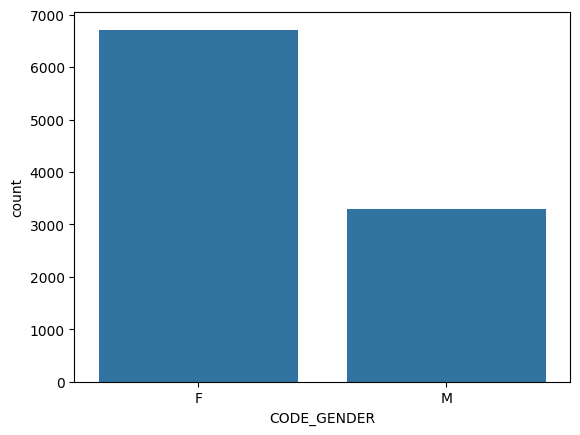

In [72]:
sns.countplot(x="CODE_GENDER", data=df)
plt.show()

In [73]:
X = df1.drop(['CODE_GENDER'], axis=1)
y = df1[['CODE_GENDER']]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.25,random_state=10)

X_train.head()

,ID,bin,BIRTH_bin3,BIRTH_bin2,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2592,6689619,c,0,0,N,N,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-21768,-5025,1,1,1,0,Managers,2.0
6078,6162608,e,0,0,Y,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-16269,-3709,1,0,0,0,Laborers,2.0
1489,6836881,c,0,0,N,Y,0,117000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-20906,-179,1,0,0,0,Laborers,1.0
4181,5126572,e,0,0,N,N,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16842,-9389,1,0,0,0,Laborers,2.0
3175,5089262,d,0,0,N,N,0,72000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18799,-1466,1,1,0,0,Cleaning staff,1.0


In [74]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train,y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train['CODE_GENDER']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['CODE_GENDER']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (7500, 20) (7500, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (4918, 20) (4918, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 F    5041
M    2459
Name: CODE_GENDER, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 F    2459
M    2459
Name: CODE_GENDER, dtype: int64


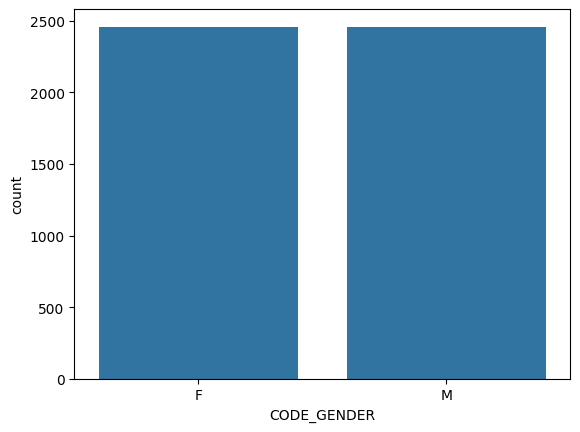

In [79]:
sns.countplot(x="CODE_GENDER", data=y_train_under)

plt.show()